# Curso: *Modulación de la MJO y el ENSO en el clima de México: teleconexiones en verano e invierno*

> **Fechas:** del **17 al 21 de noviembre de 2025**  


**Imparten:**
- Dra. Christian Domínguez Sarmiento  
- Dr. Alejandro Jaramillo Moreno  
- Dr. Jorge Luis García Franco  

---

Este cuaderno forma parte de la **sección práctica** del día 2.  
Aquí trabajaremos con datos de precipitación y predicción subestacional para México, aprendiendo a:

- Localizar y descargar datos de pronóstico subestacional relevantes.
- Abrir y explorar esos datos con Python.
- Generar gráficas sencillas que sirvan como punto de partida para sus propios análisis.

¡Bienvenid@s al taller! 🌧️📊


## Acceso y descarga de datos S2S de ECMWF

En esta sección configuraremos el acceso a los datos **subestacionales (S2S)** de ECMWF y descargaremos archivos para trabajar en el curso.

---

### 1. Crear una cuenta y obtener la llave de acceso

1. Ir a la página de instrucciones de ECMWF:  
   <https://confluence.ecmwf.int/display/WEBAPI/Access+ECMWF+Public+Datasets>
2. Crear una cuenta (si aún no la tienes) y **iniciar sesión**.
3. Una vez dentro, visitar:  
   <https://api.ecmwf.int/v1/key>  
   Ahí aparecerá tu **llave (API key)** asociada a tu usuario.

Sigue las instrucciones de la página para guardar esa llave en el archivo de configuración (normalmente `~/.ecmwfapirc`).  
> Este paso solo se hace **una vez por computadora**.

---

### 2. Instalar el cliente de ECMWF en Python

En una terminal (o en una celda de Jupyter con `!` al inicio) instala el cliente:

```bash
pip install ecmwf-api-client



## **<font color="OrangeRed">  Análisis de un par de pronósticos usando Python </font>**

Analizar pronósticos involucra la complejidad de descargar, acomodar, abrir y procesar muchos archivos y datos. Además, la dimensión del tiempo del pronóstico versus la del tiempo real puede ser difícil de entender y manejar al principio.

### **<font color="ForestGreen">  Paquetes necesarios: xarray, cartopy y cfgrib </font>**

Xarray es una biblioteca de Python poderosa y versátil diseñada para trabajar con arreglos multidimensionales etiquetados y conjuntos de datos. En el contexto de las ciencias de la Tierra, xarray es una herramienta invaluable para manejar datos complejos y multidimensionales, como series temporales, datos espaciales y climáticos.

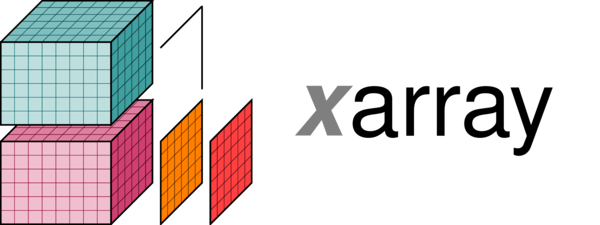

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Abrir el GRIB con xarray
control = xr.open_dataset("ECMWF_pr_20240701_control.grib",engine="cfgrib")

In [4]:
control

<xarray.Dataset> Size: 21MB
Dimensions:     (step: 185, latitude: 121, longitude: 240)
Coordinates:
    number      int64 8B ...
    time        datetime64[ns] 8B ...
  * step        (step) timedelta64[ns] 1kB 0 days 00:00:00 ... 46 days 00:00:00
    surface     float64 8B ...
  * latitude    (latitude) float64 968B 90.0 88.5 87.0 ... -87.0 -88.5 -90.0
  * longitude   (longitude) float64 2kB 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
    valid_time  (step) datetime64[ns] 1kB ...
Data variables:
    tp          (step, latitude, longitude) float32 21MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-11-19T09:34 GRIB to CDM+CF via cfgrib-0.9.1...

Este archivo corresponde a **un pronóstico de precipitación (tp)** del experimento de **control** de S2S. La estructura principal es:

- **Dimensiones:**
  - `step: 185` → número de tiempos de pronóstico (lead times) que corresponde a pasos cada 6 horas.  
    Cada `step` es un desfase de tiempo respecto a la fecha inicial `time`  
    (por ejemplo, de 0 hasta 46 días, cada 6 horas).
  - `latitude: 121` → latitudes de 90°N a 90°S (resolución de ~1.5°).
  - `longitude: 240` → longitudes de 0° a 360° (también ~1.5°).

- **Coordenadas importantes:**
  - `time` → fecha **inicial** del pronóstico (la corrida).
  - `step` → tiempo relativo al inicio (0 días, 1 día, …, 46 días).
  - `valid_time (step)` → fecha **real** de validez del pronóstico  
    (`valid_time = time + step`).
  - `number` → identificador del miembro del ensamble.  
    En el experimento de **control** es un solo valor (un único miembro).
  - `latitude`, `longitude` → la malla global regular.
  - `surface` → nivel vertical (en este caso, superficie).

- **Variable de datos:**
  - `tp (step, latitude, longitude)` → **precipitación total** (total precipitation),  
    con valores `float32`.  

In [5]:
control.step

<xarray.DataArray 'step' (step: 185)> Size: 1kB
array([               0,   21600000000000,   43200000000000,   64800000000000,
         86400000000000,  108000000000000,  129600000000000,  151200000000000,
        172800000000000,  194400000000000,  216000000000000,  237600000000000,
        259200000000000,  280800000000000,  302400000000000,  324000000000000,
        345600000000000,  367200000000000,  388800000000000,  410400000000000,
        432000000000000,  453600000000000,  475200000000000,  496800000000000,
        518400000000000,  540000000000000,  561600000000000,  583200000000000,
        604800000000000,  626400000000000,  648000000000000,  669600000000000,
        691200000000000,  712800000000000,  734400000000000,  756000000000000,
        777600000000000,  799200000000000,  820800000000000,  842400000000000,
        864000000000000,  885600000000000,  907200000000000,  928800000000000,
        950400000000000,  972000000000000,  993600000000000, 1015200000000000,
       1036800000000000, 1058400000000000, 1080000000000000, 1101600000000000,
       1123200000000000, 1144800000000000, 1166400000000000, 1188000000000000,
       1209600000000000, 1231200000000000, 1252800000000000, 1274400000000000,
       1296000000000000, 1317600000000000, 1339200000000000, 1360800000000000,
       1382400000000000, 1404000000000000, 1425600000000000, 1447200000000000,
       1468800000000000, 1490400000000000, 1512000000000000, 1533600000000000,
       1555200000000000, 1576800000000000, 1598400000000000, 1620000000000000,
       1641600000000000, 1663200000000000, 1684800000000000, 1706400000000000,
       1728000000000000, 1749600000000000, 1771200000000000, 1792800000000000,
       1814400000000000, 1836000000000000, 1857600000000000, 1879200000000000,
       1900800000000000, 1922400000000000, 1944000000000000, 1965600000000000,
       1987200000000000, 2008800000000000, 2030400000000000, 2052000000000000,
       2073600000000000, 2095200000000000, 2116800000000000, 2138400000000000,
       2160000000000000, 2181600000000000, 2203200000000000, 2224800000000000,
       2246400000000000, 2268000000000000, 2289600000000000, 2311200000000000,
       2332800000000000, 2354400000000000, 2376000000000000, 2397600000000000,
       2419200000000000, 2440800000000000, 2462400000000000, 2484000000000000,
       2505600000000000, 2527200000000000, 2548800000000000, 2570400000000000,
       2592000000000000, 2613600000000000, 2635200000000000, 2656800000000000,
       2678400000000000, 2700000000000000, 2721600000000000, 2743200000000000,
       2764800000000000, 2786400000000000, 2808000000000000, 2829600000000000,
       2851200000000000, 2872800000000000, 2894400000000000, 2916000000000000,
       2937600000000000, 2959200000000000, 2980800000000000, 3002400000000000,
       3024000000000000, 3045600000000000, 3067200000000000, 3088800000000000,
       3110400000000000, 3132000000000000, 3153600000000000, 3175200000000000,
       3196800000000000, 3218400000000000, 3240000000000000, 3261600000000000,
       3283200000000000, 3304800000000000, 3326400000000000, 3348000000000000,
       3369600000000000, 3391200000000000, 3412800000000000, 3434400000000000,
       3456000000000000, 3477600000000000, 3499200000000000, 3520800000000000,
       3542400000000000, 3564000000000000, 3585600000000000, 3607200000000000,
       3628800000000000, 3650400000000000, 3672000000000000, 3693600000000000,
       3715200000000000, 3736800000000000, 3758400000000000, 3780000000000000,
       3801600000000000, 3823200000000000, 3844800000000000, 3866400000000000,
       3888000000000000, 3909600000000000, 3931200000000000, 3952800000000000,
       3974400000000000], dtype='timedelta64[ns]')
Coordinates:
    number      int64 8B ...
    time        datetime64[ns] 8B ...
  * step        (step) timedelta64[ns] 1kB 0 days 00:00:00 ... 46 days 00:00:00
    surface     float64 8B ...
    valid_time  (step) datetime64[ns] 1kB ...
Attributes:
    long_name:    

In [6]:
ensembles = xr.open_dataset("ECMWF_pr_20240701_ensembles.grib",engine="cfgrib")

In [7]:
ensembles

<xarray.Dataset> Size: 215MB
Dimensions:     (number: 10, step: 185, latitude: 121, longitude: 240)
Coordinates:
  * number      (number) int64 80B 1 2 3 4 5 6 7 8 9 10
    time        datetime64[ns] 8B ...
  * step        (step) timedelta64[ns] 1kB 0 days 00:00:00 ... 46 days 00:00:00
    surface     float64 8B ...
  * latitude    (latitude) float64 968B 90.0 88.5 87.0 ... -87.0 -88.5 -90.0
  * longitude   (longitude) float64 2kB 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
    valid_time  (step) datetime64[ns] 1kB ...
Data variables:
    tp          (number, step, latitude, longitude) float32 215MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-11-19T09:34 GRIB to CDM+CF via cfgrib-0.9.1...

### Dataset con los 10 miembros del ensamble

El segundo archivo tiene una estructura muy similar al de control, pero ahora incluye **10 miembros de ensamble**:

- **Dimensiones nuevas/relevantes:**
  - `number: 10` → ahora hay 10 miembros (1 a 10) del ensamble.
  - `step: 185`, `latitude: 121`, `longitude: 240` → igual que en el control.

- **Coordenada `number`:**
  - `number = 1, 2, ..., 10` identifica cada miembro del ensamble.
  - Cada miembro es una realización ligeramente distinta del mismo pronóstico, que
    permite muestrear la **incertidumbre** del sistema.

In [8]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point

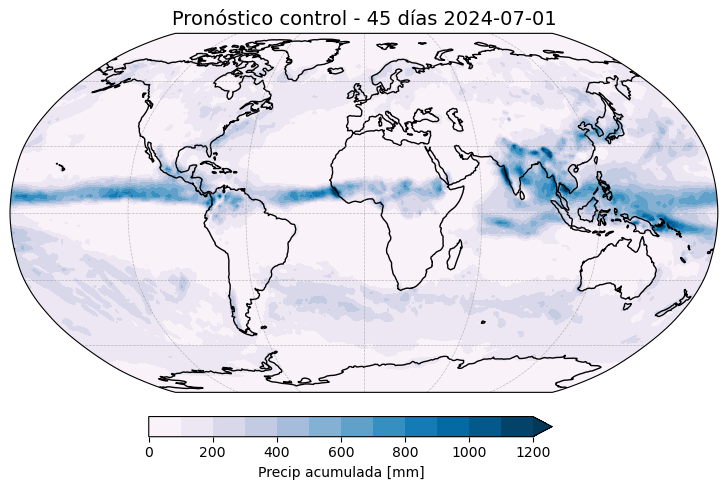

In [9]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

ax.set_global()

# Datos
lats = control.latitude
lons = control.longitude
mean_data = control.isel(step=184)['tp']  # acumulada a ~45 días

# 1) Añadir punto cíclico para evitar la línea blanca en 0°
data_cyclic, lons_cyclic = add_cyclic_point(mean_data, coord=lons)

# 2) Mapa global con contourf en el eje 'ax'
cf = ax.contourf(
    lons_cyclic,
    lats,
    data_cyclic,
    transform=ccrs.PlateCarree(),
    levels=np.arange(0, 1300, 100),
    cmap='PuBu',
    extend='max'
)

# 3) Costa y grillas
ax.coastlines()
gl = ax.gridlines(
    linewidth=0.5,
    linestyle='--',
    color='gray',
    alpha=0.5
)

# 4) Colorbar más pequeño
cbar = fig.colorbar(
    cf,
    orientation='horizontal',
    pad=0.06,      # separación con la figura
    fraction=0.05  # tamaño relativo de la barra
)
cbar.set_label('Precip acumulada [mm]')

plt.title('Pronóstico control - 45 días 2024-07-01', fontsize=14)
plt.tight_layout()



In [10]:
# -----------------------------
# 1. Definir la region
#    Ejemplo: Mexico 
# -----------------------------
lat_min, lat_max = 5, 35      # °N
lon_min, lon_max = 235, 280   # °E  

# Seleccionar datos control y de los 10 ensembles
control_tp = control["tp"].sel(latitude=slice(lat_max, lat_min),
                               longitude=slice(lon_min, lon_max))
ens_tp = ensembles["tp"].sel(latitude=slice(lat_max, lat_min),
                             longitude=slice(lon_min, lon_max))

In [11]:
# -----------------------------
# 2. Promedio de area
# -----------------------------
# Weights only depend on latitude
weights = np.cos(np.deg2rad(control_tp.latitude))
weights = weights / weights.mean()  # optional normalization

# Control: mean over lat/lon
control_area = (control_tp * weights).mean(dim=("latitude", "longitude"))

# Ensembles: mean over lat/lon for each member
ens_area_members = (ens_tp * weights).mean(dim=("latitude", "longitude"))  # (number, step)

In [12]:
# -----------------------------
# 3. Estadisticas de miembros como minimo maximo, etc
# -----------------------------
ens_mean = ens_area_members.mean(dim="number")
ens_min = ens_area_members.min(dim="number")
ens_max = ens_area_members.max(dim="number")

# Encontrar coordenada de tiempo verdadera
time_coord = control_area["valid_time"]

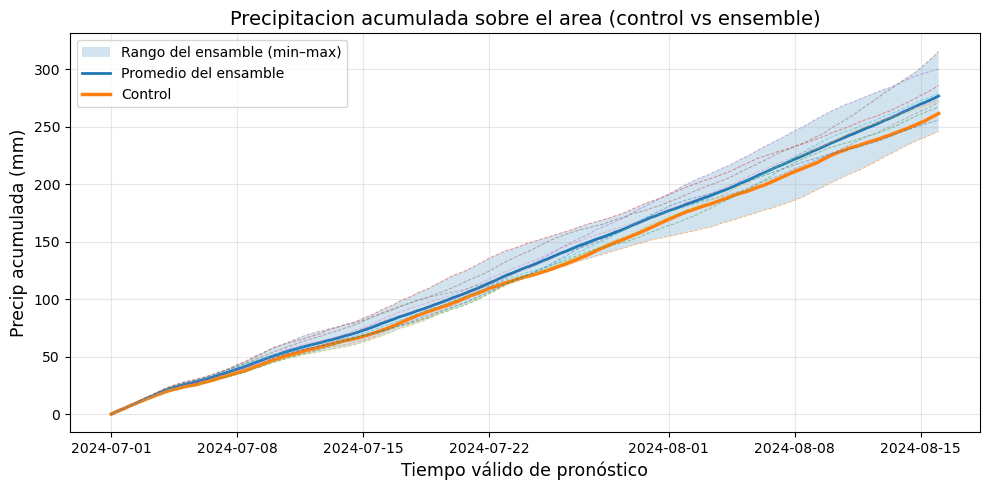

In [17]:
# -----------------------------
# 4. Graficar la serie de tiempo
# -----------------------------
plt.figure(figsize=(10, 5))

# Sombreado para el rango del ensamble (minimo a maximo)
plt.fill_between(time_coord.values,
                 ens_min.values,
                 ens_max.values,
                 alpha=0.2,
                 label="Rango del ensamble (min–max)")

# Media del ensamble (promedio sobre el eje number)
plt.plot(time_coord,
         ens_mean,
         linewidth=2,
         label="Promedio del ensamble")

# Pronostico de control (unico miembro)
plt.plot(time_coord,
         control_area,
         linewidth=2.5,
         label="Control",
         linestyle="-")

# Miembros perturbados individuales (lineas punteadas tenues)
for m in ens_area_members["number"].values:
    plt.plot(time_coord,
             ens_area_members.sel(number=m),
             linestyle="--",
             linewidth=0.7,
             alpha=0.5)

# Etiquetas y formato de la figura
plt.xlabel("Tiempo válido de pronóstico",fontsize=12.5)
plt.ylabel("Precip acumulada (mm)",fontsize=12.5)
plt.title("Precipitacion acumulada sobre el area (control vs ensemble)",fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()


## <font color="RoyalBlue">¿Qué más podríamos hacer con estos datos?</font>

Hasta aquí solo hemos visto un ejemplo sencillo: comparar el pronóstico de control con los miembros del ensamble, usando la **precipitación acumulada** promediada sobre un área.

Para seguir explorando (o para dejar tareas / mini proyectos), se pueden plantear varias extensiones:

---

### <font color="ForestGreen">1. Agregar observaciones o reanálisis</font>

- Descargar datos de lluvia observada o de reanálisis  
  (por ejemplo **ERA5**, **CHIRPS**, **GPM**, etc.).
- Calcular la misma cantidad (promedio espacial sobre la misma región) y comparar
  pronóstico vs. “realidad”:
  - sesgo medio,
  - error cuadrático medio,
  - correlación y alguna medida simple de habilidad (*skill*).

---

### <font color="DarkOrange">2. Pasar de acumulado a lluvia diaria</font>

- En lugar de usar la **precipitación acumulada** hasta cada paso,
  construir la **precipitación media diaria** entre pasos consecutivos  
  (por ejemplo, diferencias en el tiempo divididas entre el número de días).
- Ver cómo cambia:
  - la señal de los picos de lluvia,
  - la dispersión del ensamble,
  - la utilidad para impactos (inundaciones, suelos saturados, etc.).

---

### <font color="MediumVioletRed">3. Usar más de una condición inicial</font>

- Repetir el ejercicio para varias fechas de inicio `time`
  (no solo un pronóstico).
- Comparar:
  - la evolución de la lluvia según la época del año,
  - cómo cambia la habilidad según la fase de **ENSO** o la **MJO**,
  - la robustez del ensamble en distintas situaciones.

---

### <font color="SaddleBrown">4. Pensar en probabilidades, no solo en medias</font>

- A partir de los miembros del ensamble, calcular:
  - porcentaje de miembros con lluvia mayor a cierto umbral
    (por ejemplo, > 50 mm en 10 días, > 100 mm en 30 días),
  - mapas o series de tiempo de esa probabilidad.
- Esto se acerca más a productos del tipo “¿qué tan probable es que…?”,
  útiles para manejo de riesgos.

---

### <font color="Teal">5. Cambiar la región de estudio</font>

- Definir otras cajas geográficas:
  - norte de México,
  - Golfo de México,
  - Pacífico mexicano,
  - Centroamérica.
- Comparar cómo cambia la respuesta del ensamble según la región.

---

<div class="alert alert-block alert-info">
<b>Pregunta para discutir:</b> Si solo tuvieras acceso a estos pronósticos
subestacionales de lluvia, <b>¿qué diagnósticos o productos</b> (series, mapas,
probabilidades, umbrales) serían más útiles para:
<ul>
  <li>agricultores,</li>
  <li>protección civil,</li>
  <li>operación de presas y almacenamiento de agua?</li>
</ul>
Esta libreta es solo el punto de partida; puede crecer en un pequeño
<b>conjunto de notebooks que uses para aprender de predicción subestacional para México</b>. 🌧📈
</div>
